# Multiomics Visualisation

For more information please contact [Tyrone Chen](mailto:tyrone.chen@monash.edu) or [Sonika Tyagi](mailto:sonika.tyagi@monash.edu).

## Table of contents
1. [Information for biologists](#biologists)
2. [Information for bioinformaticians](#bioinformaticians)
3. [Plotting steps](#plotting)


## UpSetPlots

### Information for biologists <a name="biologists"></a>
UpSetPlots are a visualisation method which can be interpreted as a quantitative venn diagram. [More information on the method can be found in the original 2014 publication](https://rdcu.be/bO4oV), and a [sample interactive UpSetPlot on unrelated data is available here](https://vdl.sci.utah.edu/upset2/embed.html#{"NavBar":false,"FilterBox":false,"DataSetInfo":false,"LeftSideBar":true,"RightSideBar":false,"ProvenanceView":false,"DeviationBars":true,"CardinalityBars":true}).

### Information for biolnformaticians <a name="bioinformaticians"></a>
Implementations exist in [javascript](https://github.com/VCG/upset), [python](https://pypi.org/project/UpSetPlot/) and [R](https://github.com/hms-dbmi/UpSetR). For this `python` implementation the requirements is just `upsetplot` which can be installed with:

```
pip install upsetplot
```
or
```
conda install upsetplot -c conda-forge
```
[OPTIONAL] If using a jupyter notebook in a `conda` or other virtual environment, the following library can be used to easily switch kernels:
```
nb_conda=2.2.1
```

## Plotting steps <a name="plotting"></a>

The aim is to plot the intersection of foo across bar.

Below is an example use case:

In [1]:
import pandas
from matplotlib import pyplot as plt
from upsetplot import from_contents, from_memberships, plot, generate_counts, UpSet
%matplotlib inline

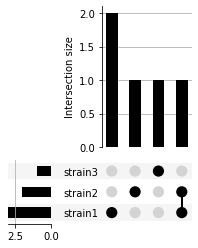

id
strain1 strain2 strain3           
True    False   False    pathway_a
        True    False    pathway_b
        False   False    pathway_c
False   True    False    pathway_d
        False   True     pathway_e

In [2]:
contents = {'strain1': ['pathway_a', 'pathway_b', 'pathway_c'],
            'strain2': ['pathway_b', 'pathway_d'],
            'strain3': ['pathway_e']}
contents = from_contents(contents)

upset = UpSet(contents, subset_size='count')#, intersection_plot_elements=3)
upset.plot()
plt.show()

contents

Reformatting the input data is straightforward:
    1. Load input data as a pandas dataframe
    2. Extract the required fields
    3. Reformat data to an input for upsetplot
    4. Make UpSetPlot

For the input data, we use information generated previously in the file `KEGG_Fisher_Exact_test_all_results.tsv`, `MD5 ec4faa14d08cf6f9ffc4631192127b3a`.

### Load input data as a pandas dataframe

Here is how the full dataset looks like:

In [3]:
infile_path = "KEGG_Fisher_Exact_test_all_results.tsv"
data = pandas.read_csv(infile_path, sep="\t")
data.head()

,Species,Strain,Type_of_Experiment,Comparisons,Direction,kegg_pathway_name,kegg_pathway_id,p_value_raw,odds_ratio,FDR,is_de_genes.TRUE|is_gene_set.TRUE,is_de_genes.TRUE|is_gene_set.FALSE,is_de_genes.FALSE|is_gene_set.TRUE,is_de_genes.FALSE|is_gene_set.FALSE,de_gene_with_annotation_list
0,Streptococcus pneumoniae,4496,RNA-Seq,Sera vs. RPMI + Galactose,Down,Pyrimidine metabolism,240,1.601326e-02,1.823092,1.000000e+00,24,446,46,1559,"WP_127820727.1, WP_000763053.1, WP_000120709.1..."
1,Streptococcus pneumoniae,4496,RNA-Seq,Sera vs. RPMI + Galactose,Down,Metabolic pathways,1100,6.745431e-09,1.901218,9.173787e-07,183,287,403,1202,"WP_000451584.1, WP_000176987.1, WP_000651213.1..."
2,Streptococcus pneumoniae,4496,RNA-Seq,Sera vs. RPMI + Galactose,Down,Cysteine and methionine metabolism,270,2.782556e-01,1.275864,1.000000e+00,13,457,35,1570,"WP_000331296.1, WP_000216382.1, WP_000167817.1..."
3,Streptococcus pneumoniae,4496,RNA-Seq,Sera vs. RPMI + Galactose,Down,Biosynthesis of secondary metabolites,1110,2.164623e-06,1.943849,2.900595e-04,95,375,185,1420,"WP_127820724.1, WP_127820744.1, WP_001216915.1..."
4,Streptococcus pneumoniae,4496,RNA-Seq,Sera vs. RPMI + Galactose,Down,Biosynthesis of amino acids,1230,6.001860e-04,1.940969,7.622362e-02,45,425,83,1522,"WP_001216915.1, WP_000191798.1, WP_127820776.1..."


### Extract the required fields

Comparisons of interest:
- ...


In [4]:
print("".join(["Quantity of experiment types: ", str(len(data.Type_of_Experiment.unique()))]))
print("".join(["Quantity of KEGG pathways: ", str(len(data.kegg_pathway_name.unique()))]))

Quantity of experiment types: 5
Quantity of KEGG pathways: 283


### Reformat data to an input for upsetplot
This block below is an implementation test only (arbitrary group comparisons). We can substitute in comparisons of interest.

In [5]:
# glue the species and strain into a separate column
data["Species_Strain_Type_of_Experiment"] = data["Species"] + " " + data["Strain"] + " " + data["Type_of_Experiment"]

# filter out the data of interest
omics_kegg = data.loc[ : , ['Species_Strain_Type_of_Experiment', 'kegg_pathway_name'] ]

# this is just a test case to test implementation
omics_kegg.drop_duplicates(inplace=True)
collapse_kegg = lambda x: "|".join(x).split("|")
omics_kegg = omics_kegg.groupby(omics_kegg['Species_Strain_Type_of_Experiment']).aggregate({'kegg_pathway_name':collapse_kegg})

# extract only strain B36:[pathways] to test implementation
omics_kegg = omics_kegg.reset_index()
omics_kegg = omics_kegg[omics_kegg["Species_Strain_Type_of_Experiment"].str.contains("B36")]
omics_kegg = omics_kegg.set_index("Species_Strain_Type_of_Experiment")

# reformat into UpSetPlot compatible input
omics_kegg = omics_kegg.to_dict()['kegg_pathway_name']
omics_kegg = from_contents(omics_kegg)
omics_kegg.head()

id
Escherichia coli B36 Metabolomics GC-MS Escherichia coli B36 Metabolomics LC-MS Escherichia coli B36 RNA-Seq                                           
True                                    True                                    True                                             Fatty acid degradation
                                                                                True                                                Lysine biosynthesis
                                                                                True                                                 Lysine degradation
                                                                                True                          Penicillin and cephalosporin biosynthesis
                                                                                True                                    2-Oxocarboxylic acid metabolism

### Make UpSetPlot

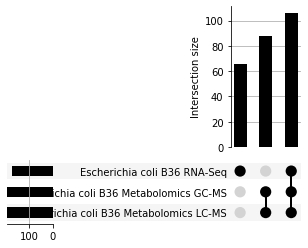

id
Escherichia coli B36 Metabolomics GC-MS Escherichia coli B36 Metabolomics LC-MS Escherichia coli B36 RNA-Seq                                           
True                                    True                                    True                                             Fatty acid degradation
                                                                                True                                                Lysine biosynthesis
                                                                                True                                                 Lysine degradation
                                                                                True                          Penicillin and cephalosporin biosynthesis
                                                                                True                                    2-Oxocarboxylic acid metabolism

In [6]:
# this is the actual plotting block
upset = UpSet(omics_kegg, subset_size='count')#, intersection_plot_elements=3)
upset.plot()
plt.show()
omics_kegg.head()

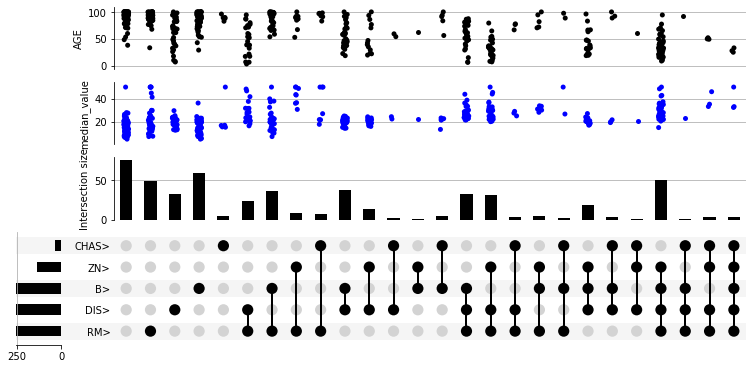

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE  \
CHAS> B>   ZN>   DIS> RM>                                                    
False True True  True True  0.00632  18.0   2.31   0.0  0.538  6.575  65.2   
           False True True  0.02731   0.0   7.07   0.0  0.469  6.421  78.9   
                      True  0.02729   0.0   7.07   0.0  0.469  7.185  61.1   
                      True  0.03237   0.0   2.18   0.0  0.458  6.998  45.8   
                      True  0.06905   0.0   2.18   0.0  0.458  7.147  54.2   

                               DIS  RAD    TAX  PTRATIO       B  LSTAT  \
CHAS> B>   ZN>   DIS> RM>                                                
False True True  True True  4.0900  1.0  296.0     15.3  396.90   4.98   
           False True True  4.9671  2.0  242.0     17.8  396.90   9.14   
                      True  4.9671  2.0  242.0     17.8  392.83   4.03   
                      True  6.0622  3.0  222.0     18.7  394.63   2.94   
                      True  6.0622  3.0  222.0     18.7  396.90   5.33   

                            median_value  
CHAS> B>   ZN>   DIS> RM>                 
False True True  True True          24.0  
           False True True          21.6  
                      True          34.7  
                      True          33.4  
                      True          36.2

In [8]:
# more complex example (reference only, requires scikit-learn to be installed)
import pandas as pd
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt
from upsetplot import UpSet

# Load the dataset into a DataFrame
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

# Get five features most correlated with median house value
correls = boston_df.corrwith(pd.Series(boston.target),
                             method='spearman').sort_values()
top_features = correls.index[-5:]

# Get a binary indicator of whether each top feature is above average
boston_above_avg = boston_df > boston_df.median(axis=0)
boston_above_avg = boston_above_avg[top_features]
boston_above_avg = boston_above_avg.rename(columns=lambda x: x + '>')

# Make this indicator mask an index of boston_df
boston_df = pd.concat([boston_df, boston_above_avg],
                      axis=1)
boston_df = boston_df.set_index(list(boston_above_avg.columns))

# Also give us access to the target (median house value)
boston_df = boston_df.assign(median_value=boston.target)

# UpSet plot it!
upset = UpSet(boston_df, subset_size='count', intersection_plot_elements=3)
upset.add_catplot(value='median_value', kind='strip', color='blue')
upset.add_catplot(value='AGE', kind='strip', color='black')
upset.plot()
plt.show()
boston_df.head()